In [86]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn


media = pd.read_csv('/Users/heathercohen/Desktop/MedMen/Media Spend-Table 1.csv')
sku = pd.read_csv('/Users/heathercohen/Desktop/MedMen/SKUs-Table 1.csv')
sales = pd.read_csv('/Users/heathercohen/Desktop/MedMen/Sales Report-Table 1.csv')
market = pd.read_csv('/Users/heathercohen/Desktop/MedMen/Market-Table 1.csv')
traffic = pd.read_csv('/Users/heathercohen/Desktop/MedMen/Traffic-Table 1.csv')

In [87]:
##  Fix formatting

traffic['Date'] = pd.to_datetime(traffic['Date'], format='%d-%b-%y')

In [88]:

traffic.iloc[:,1] = pd.to_numeric(traffic.iloc[:,1].str.replace('\W', ''))
traffic.iloc[:,2] = pd.to_numeric(traffic.iloc[:,2].str.replace('\W', ''))
traffic.iloc[:,3] = pd.to_numeric(traffic.iloc[:,3].str.replace('\W', ''))
traffic = traffic.drop(columns=['Unnamed: 4'])

In [90]:
traffic.dtypes

Date          datetime64[ns]
Visitors               int64
Visits                 int64
Page Views             int64
dtype: object

In [93]:
media['Date'] = pd.to_datetime(media['Date'], format='%d-%b-%y')

In [94]:
media.iloc[:,2] = pd.to_numeric(media.iloc[:,2].str.replace('\W', ''))
media.iloc[:,1] = pd.to_numeric(media.iloc[:,1].str.replace('\W', ''))
media.iloc[:,3] = pd.to_numeric(media.iloc[:,3].str.replace('\W', ''))
media.iloc[:,4] = pd.to_numeric(media.iloc[:,4].str.replace('\W', ''))

In [95]:
media.dtypes

Date             datetime64[ns]
GRP (OOH)               float64
PPC Spend               float64
Display Spend             int64
email Spend             float64
dtype: object

In [96]:
sku.iloc[:,2]= pd.to_numeric(sku.iloc[:,2].str.replace('\W', ''))
sku.iloc[:,3]= pd.to_numeric(sku.iloc[:,3].str.replace('\W', ''))

In [97]:
sku = sku.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])


In [98]:
sku = sku.truncate(after=9)

In [149]:
sku['SKU']=sku['SKU'].astype('int64')
sku.dtypes

SKU                      int64
Product Name            object
Value                  float64
Beginning Inventory    float64
dtype: object

In [100]:
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%b-%y')
sales = sales.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

In [112]:
sales.iloc[:,2]= pd.to_numeric(sales.iloc[:,2].str.replace('\W', ''))
sales.iloc[:,1]= pd.to_numeric(sales.iloc[:,1].str.replace('\W', ''))

In [148]:
sales.dtypes

Date                       datetime64[ns]
Transaction ID (Unique)             int64
SKU                                 int64
dtype: object

In [101]:
market = market.truncate(after=726)
#Remove grand total line to allow datetime formatting, can add in totals later 

In [102]:
market['Date'] = pd.to_datetime(market['Date'], format='%d-%b-%y')
market.iloc[:,2]= pd.to_numeric(market.iloc[:,2].str.replace('\W', ''))
market.iloc[:,1]= pd.to_numeric(market.iloc[:,1].str.replace('\W', ''))
market = market.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

market.dtypes

In [117]:
##    Explore Data


In [63]:
media.describe()

,Date,GRP (OOH),PPC Spend,Display Spend,email Spend
count,731,731,731,731,731
unique,731,281,282,392,282
top,2008-07-11 00:00:00,,120,1037,38
freq,1,35,15,7,15
first,2008-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2009-12-31 00:00:00,NaN,NaN,NaN,NaN


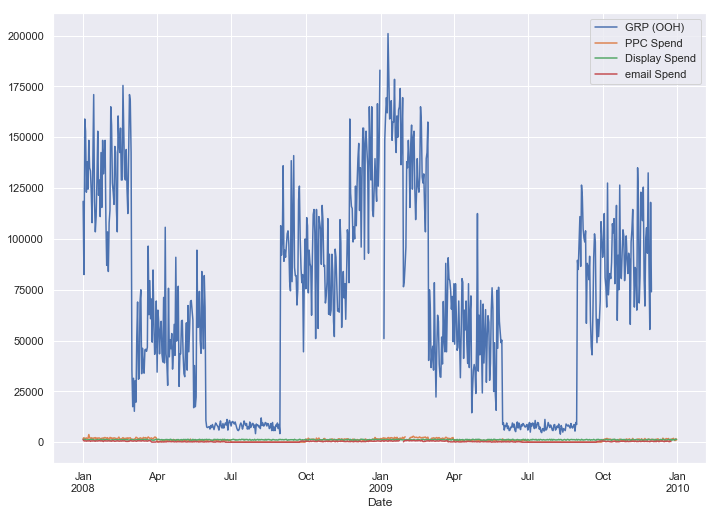

In [238]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
media.set_index('Date').plot()

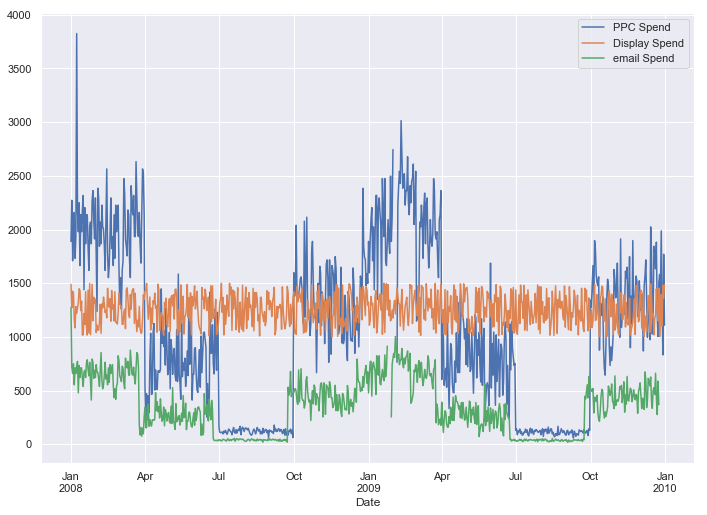

In [237]:
#media2 = media.drop(media.columns[1], axis=1)
sns.set(rc={'figure.figsize':(11.7,8.27)})
media2.set_index('Date').plot()


In [64]:
sku.describe()

,SKU
count,10.00000
mean,105.50000
std,3.02765
min,101.00000
25%,103.25000
50%,105.50000
75%,107.75000
max,110.00000


In [156]:
sku['SKU'].value_counts()

110    1
109    1
108    1
107    1
106    1
105    1
104    1
103    1
102    1
101    1
Name: SKU, dtype: int64

In [65]:
sales.describe()

,SKU
count,8043.000000
mean,104.833893
std,3.184653
min,101.000000
25%,102.000000
50%,104.000000
75%,108.000000
max,110.000000


In [154]:
sales['SKU'].value_counts()

102    1338
103    1278
101    1259
110     881
108     847
109     828
105     637
104     584
107     205
106     186
Name: SKU, dtype: int64

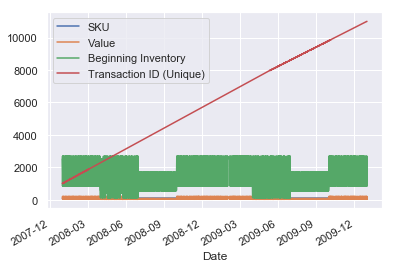

In [159]:
sales2 =sku.merge(sales, on="SKU")
sales2.set_index('Date').plot()

In [164]:
sales2.head()

,SKU,Product Name,Value,Beginning Inventory,Date,Transaction ID (Unique)
0,101,Pineappple Express 1G,50.0,2518.0,2008-01-01,1003
1,101,Pineappple Express 1G,50.0,2518.0,2008-01-01,1005
2,101,Pineappple Express 1G,50.0,2518.0,2008-01-01,1006
3,101,Pineappple Express 1G,50.0,2518.0,2008-01-01,1009
4,101,Pineappple Express 1G,50.0,2518.0,2008-01-01,1012


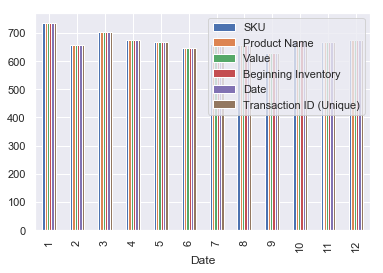

In [163]:

sales2.groupby(sales2["Date"].dt.month).count().plot(kind="bar")

In [66]:
market.describe()

,Date,Visits to competitor sites,Social Media Mentions
count,727,727,727
unique,727,727,726
top,2008-07-11 00:00:00,1452490,552475
freq,1,1,2
first,2008-01-01 00:00:00,NaN,NaN
last,2009-12-31 00:00:00,NaN,NaN


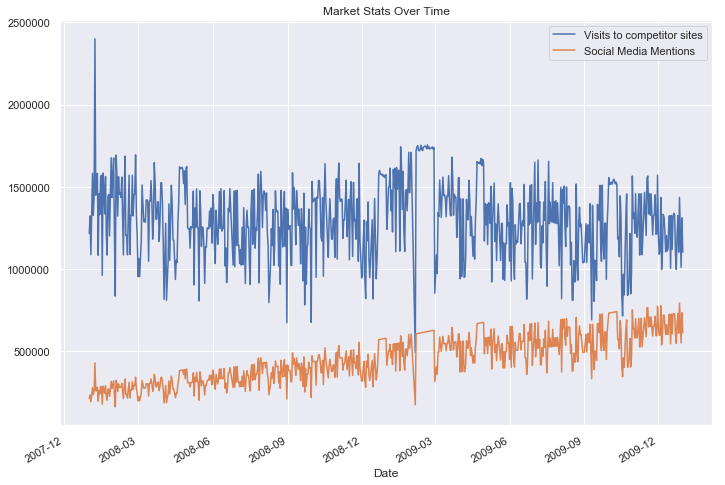

In [359]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
market.set_index('Date').plot()
plt.title('Market Stats Over Time')
plt.savefig("MMmarket.png")

In [72]:
traffic.describe()

,Date,Visitors,Visits,Page Views
count,8043,8043,8043,8043
unique,727,6270,6596,6728
top,2008-01-08 00:00:00,108127,132681,161869
freq,20,6,6,6
first,2008-01-01 00:00:00,NaN,NaN,NaN
last,2009-12-31 00:00:00,NaN,NaN,NaN


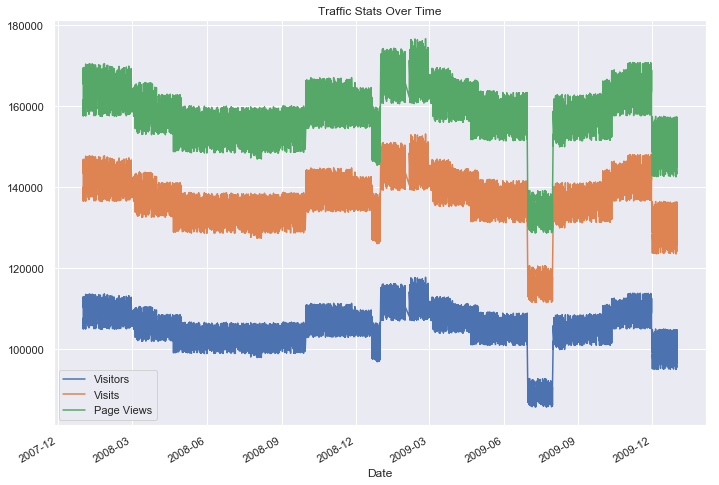

In [360]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
traffic.set_index('Date').plot()
plt.title('Traffic Stats Over Time')
plt.savefig("MMtraffic.png")

In [178]:
## If the goal is to increase revenue, we have to see what's driving it 

sales2.groupby(['Product Name']).sum().sort_values(by=['Value'], ascending=False)

,SKU,Value,Beginning Inventory,Transaction ID (Unique)
Product Name,,,,
Fruit Punch - 100 MG,136476,267600.0,3580488.0,7496774
Lip Balm - CBD,131634,95850.0,1088856.0,7340828
Pineappple Express 1G,127159,62950.0,3170162.0,6798835
WiFi - 1G,90252,62100.0,457056.0,5121369
Cookie Brownie Bar - 10MG,96910,44050.0,518028.0,5656469
Cannabis T-Shirt,91476,42350.0,1434818.0,5385902
zen pen - 500mg,60736,23360.0,682112.0,4130778
Blue Diamond - 3G,66885,19110.0,811538.0,4405370
Nosh OG - 0.3G,19716,5580.0,23064.0,1021443


In [240]:
sales2.groupby(['Product Name', 'Date']).sum().sort_values(by=['Value'], ascending=False).head()

SKU   Value  Beginning Inventory  \
Product Name         Date                                            
Fruit Punch - 100 MG 2009-02-24  1020  2000.0              26760.0   
                     2008-01-08  1020  2000.0              26760.0   
                     2008-01-31   918  1800.0              24084.0   
                     2009-02-14   918  1800.0              24084.0   
                     2008-02-08   816  1600.0              21408.0   

                                 Transaction ID (Unique)  
Product Name         Date                                 
Fruit Punch - 100 MG 2009-02-24                    68882  
                     2008-01-08                    11040  
                     2008-01-31                    12842  
                     2009-02-14                    60723  
                     2008-02-08                    12318

In [190]:
stuff=['Product Name', 'Date', 'Value']
sales3 = sales2[stuff]

In [212]:
sales4 = sales3.pivot_table(index='Date', columns='Product Name', values='Value', aggfunc='sum')


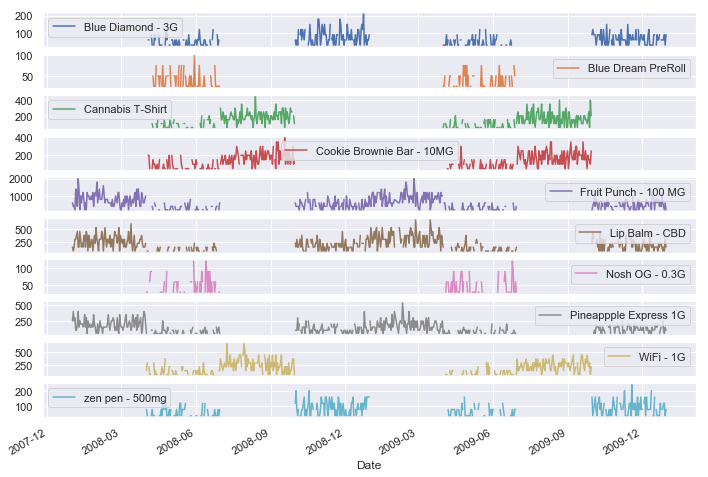

In [362]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
xxx = sales4.plot(subplots=True)
plt.savefig("salesbyproduct.png")

In [252]:
sales5 = sales2.groupby(['Date']).sum().sort_values(by=['Value'], ascending=False)

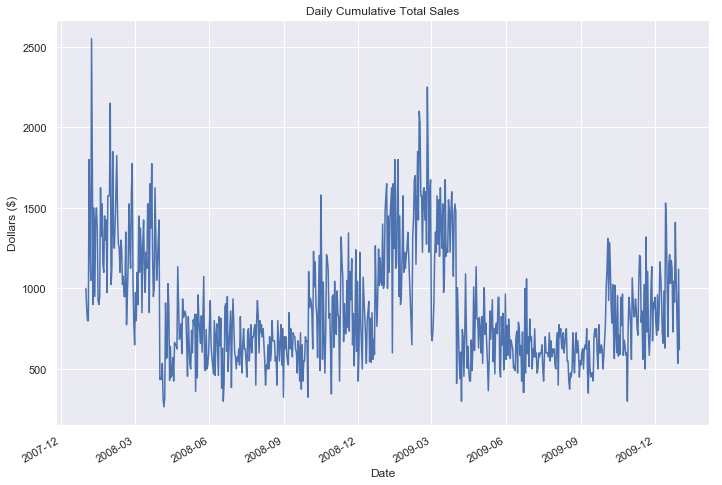

In [363]:
sales5['Value'].plot()
plt.title('Daily Cumulative Total Sales')
plt.ylabel("Dollars ($)")
plt.savefig("totalsalesbydate.png")

In [292]:
import numpy as np

#correct for missing dates
grp = media['GRP (OOH)'].truncate(after=726)


sales6 = sales5.sort_values(by='Date')

dailysalestotals = []

for val in sales6['Value']:
    dailysalestotals.append(val)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


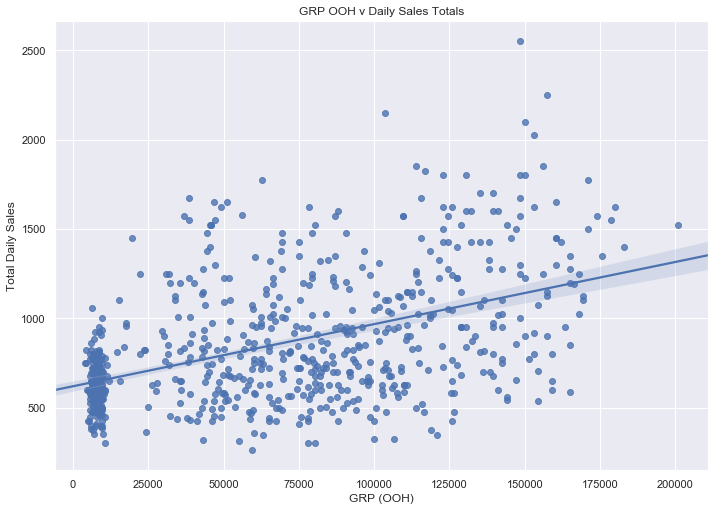

In [358]:
sns.regplot(x=grp, y=dailysalestotals)
plt.title('GRP OOH v Daily Sales Totals')
plt.ylabel("Total Daily Sales")
plt.savefig("salesvgrp.png")

In [340]:

ppc = media['PPC Spend'].truncate(after=726)
dsp= media['Display Spend'].truncate(after=726)
eml= media['email Spend'].truncate(after=726)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


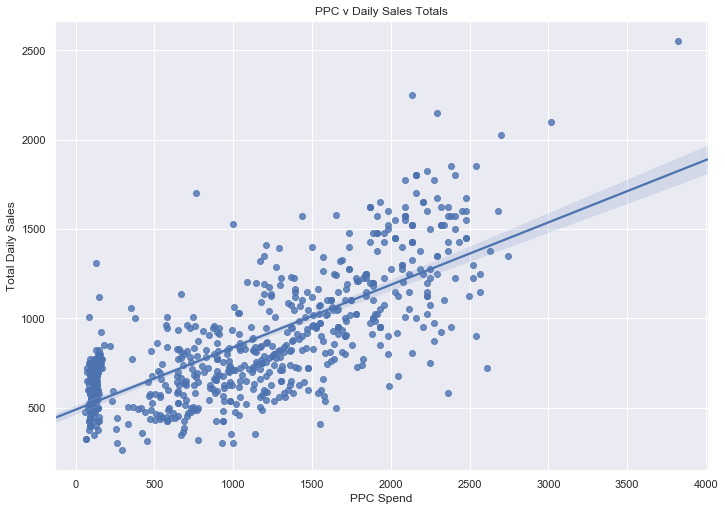

In [357]:
sns.regplot(x=ppc, y=dailysalestotals)
plt.title('PPC v Daily Sales Totals')
plt.ylabel("Total Daily Sales")
plt.savefig("salesvppc.png")

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


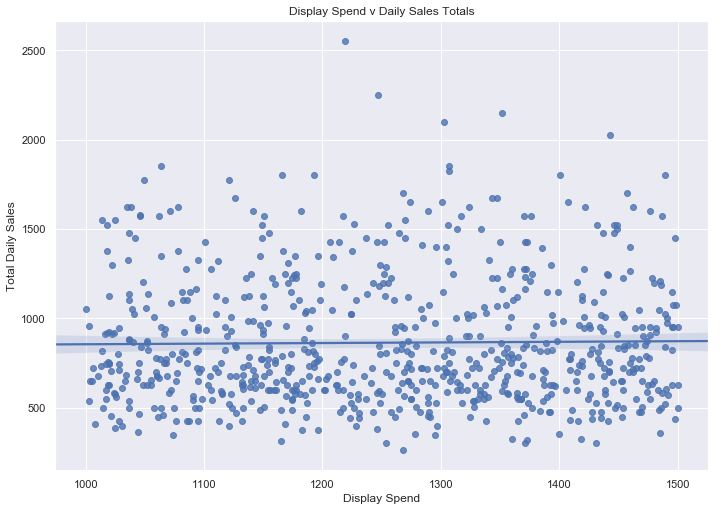

In [356]:
sns.regplot(x=dsp, y=dailysalestotals)
plt.title('Display Spend v Daily Sales Totals')
plt.ylabel("Total Daily Sales")
plt.savefig("salesvdsp.png")

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


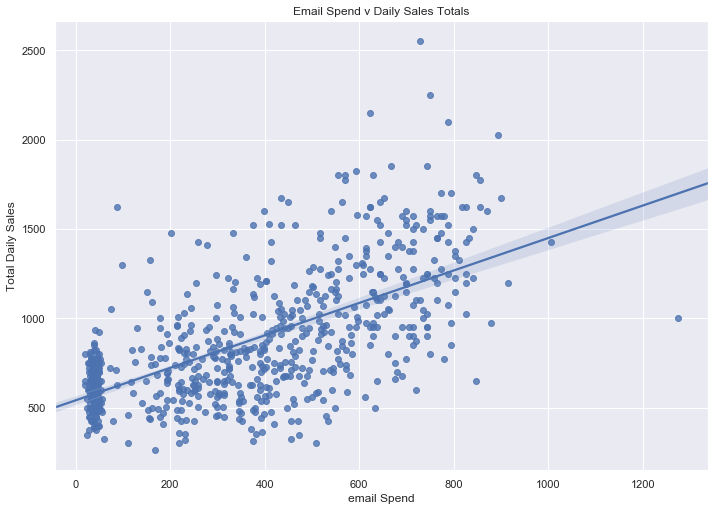

In [355]:
sns.regplot(x=eml, y=dailysalestotals)
plt.title('Email Spend v Daily Sales Totals')
plt.ylabel("Total Daily Sales")
plt.savefig("salesveml.png")

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


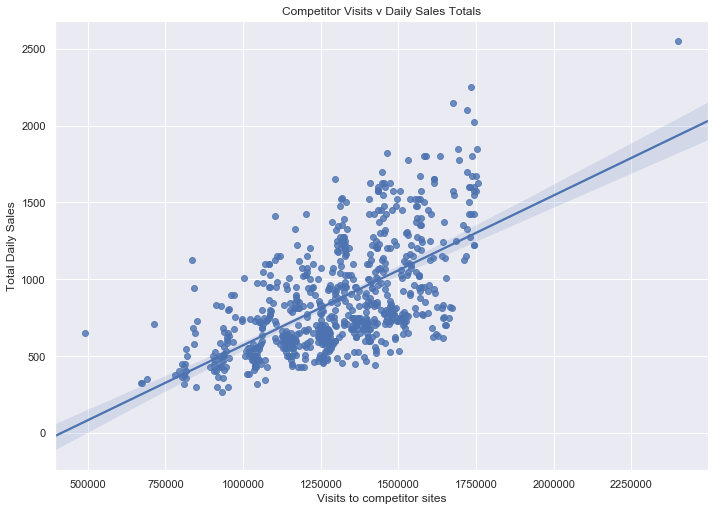

In [354]:
sns.regplot(x=market['Visits to competitor sites'], y=dailysalestotals)
plt.title('Competitor Visits v Daily Sales Totals')
plt.ylabel("Total Daily Sales")
plt.savefig("salesvCompvisits.png")

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


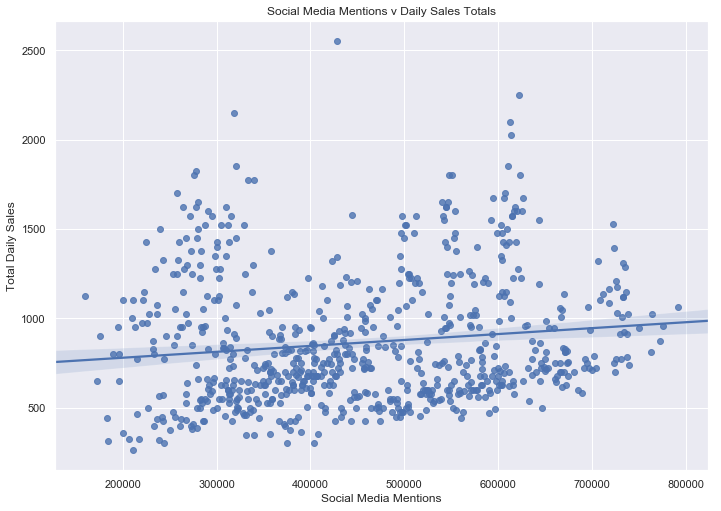

In [353]:
sns.regplot(x=market['Social Media Mentions'], y=dailysalestotals)
plt.title('Social Media Mentions v Daily Sales Totals')
plt.ylabel("Total Daily Sales")
plt.savefig("salesvSMM.png")

In [367]:
sales4['Fruit Punch - 100 MG']


FPsalestotals = []

for val in sales4['Fruit Punch - 100 MG']:
    FPsalestotals.append(val)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


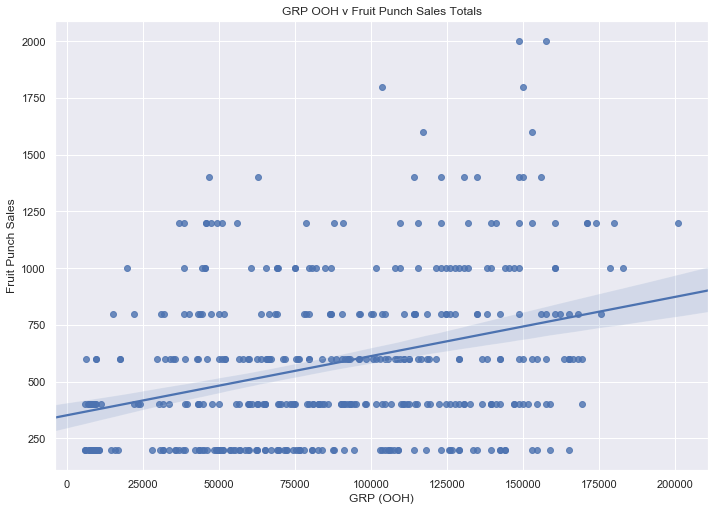

In [370]:
sns.regplot(x=grp, y=FPsalestotals)
plt.title('GRP OOH v Fruit Punch Sales Totals')
plt.ylabel("Fruit Punch Sales")
plt.savefig("FPSales.png")

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


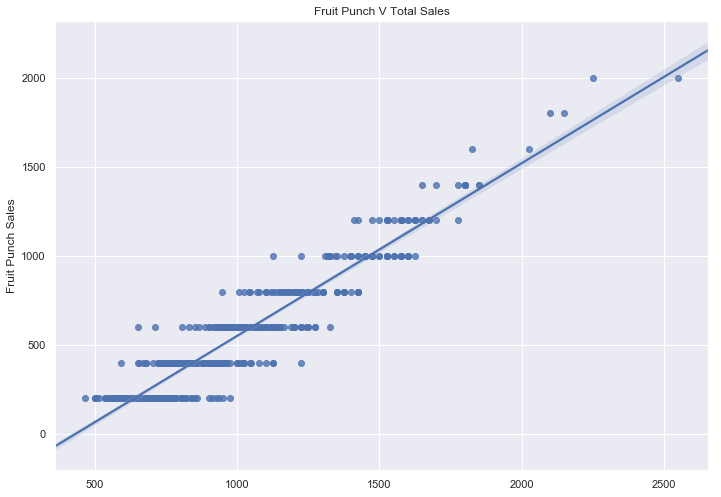

In [372]:
sns.regplot(x=dailysalestotals, y=FPsalestotals)
plt.title('Fruit Punch V Total Sales')
plt.ylabel("Fruit Punch Sales")
plt.savefig("FPvAllSales.png")

In [374]:
sales4.columns


LBsalestotals = []

for val in sales4['Lip Balm - CBD']:
    LBsalestotals.append(val)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


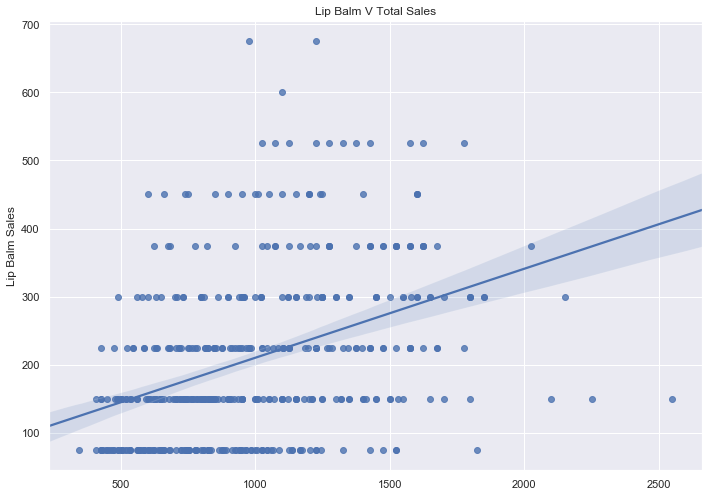

In [375]:
sns.regplot(x=dailysalestotals, y=LBsalestotals)
plt.title('Lip Balm V Total Sales')
plt.ylabel("Lip Balm Sales")
plt.savefig("LBvAllSales.png")

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


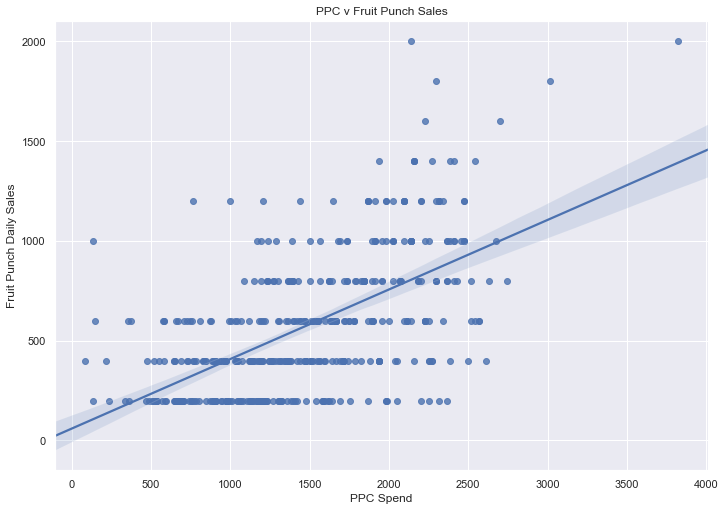

In [376]:
sns.regplot(x=ppc, y=FPsalestotals)
plt.title('PPC v Fruit Punch Sales')
plt.ylabel("Fruit Punch Daily Sales")
plt.savefig("FP_ppc.png")